# The Solow model with human capital

We consider the Solow model with human capital. In this model the capital is separated into human- and physical capital. Human capital is defined as abilities of the workers linked to productivity such as education and experience. Human capital as well as physical capital accumulates over time at different savings rates.  The project examines both numerical and analytical solutions of the model. Further the project analyses a shock to the savings rate of human capital as well as the golden value that maximises the private consumption. 

Imports and set magics:

In [73]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy import Symbol
from sympy.solvers import solve
sm.init_printing(use_unicode=True) # for pretty printing
from IPython.display import display
import matplotlib.pyplot as plt # baseline modul
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


![test](https://media.giphy.com/media/13HgwGsXF0aiGY/source.gif)

![test](https://media.giphy.com/media/eCqFYAVjjDksg/giphy.gif)

# The basic solow model

The **basic Solow model** contains:

* $K_t$ is capital
* $L_t$ is labor
* $Y_t = F(K_t,L_t)$ 

**GDP** is defined as

$ Y_{t}=BK_{t}^{\alpha}L_{t}^{1-\alpha} $

**Saving** is a constant fraction of GDP

$ S_t = sY_t,\, s\in(0,1) $

such that **capital accumulates** according to

$ K_{t+1}=S_t+(1-\delta)K_{t}, \delta \in (0,1) $

where $k_t=K_t/L_t$


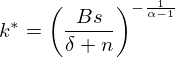

In [110]:
#We define all symbols
n = sm.symbols('n')
s = sm.symbols('s')
B = sm.symbols('B')
k = sm.symbols('k')
kstar = sm.symbols('k^*')
ystar = sm.symbols('y^*')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')

# Transition Equation
bssk = sm.Eq(((s*B*k**alpha-(n+delta)*k)/(1+n)))

# Solving to get the steady state equations for k and y
k_ss = sm.solve(bssk,k)[0]
sm.Eq(kstar,k_ss)


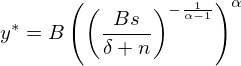

In [109]:
#From this the y steady state value is
sm.Eq(ystar,B*k_ss**alpha)

In [111]:
#We turn the solution into a Python funciton
bssk_sol = sm.lambdify((alpha,delta),k_ss)


In [146]:
#We define model parameters as plausible empirical values
n=0.01
s=0.4
B=1
delta=0.01
alpha=1/3

#The steady state value for k is printed with the parameter values
bssk_val = bssk_sol(alpha, delta, s, B, n)
sm.Eq(kstar,bssk_val)

In [147]:
#From this we can define the steady state value for y
y_ss = B*bssk_val**alpha
sm.Eq(ystar,y_ss)

In [197]:
def simulate_basic(k,n,s,B,alpha,delta,T):
    """
    Args:
    k      (int)  : initial value for physical capital per worker
    alpha  (float): return on physical capital
    delta  (float): depreciation rate on capital
    s      (float): savings/investments
    n      (float): increase in labour
    B      (int)  : totalfactorproductivity
    T      (int)  : periods to simulate through
    
    Returns:
    A plot showing how capital per worker accumulates over time"""
    
    #First we make a list for our future values to be in
    k_path = [k]
    
    #Then we make which will contain the values for the 45-degree-line
    Degreeline = [0]
    
    #We generate the 45-degree-line for the basic Solow model
    for t in range(1,T):
        line = (n + delta)*t
        Degreeline.append(line)
        
    #We generate the Solow movement
    for t in range(1,T):
        k_plus = s*B*t**alpha
        k_path.append(k_plus)
    
    #Plotting the stuff
    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(5,5))
    plt.plot(k_path[:T], label='$sBk_t^{\u03B1}$', color = 'magenta')
    plt.plot(Degreeline[:T], label = '$(n+\delta)k_t$', color = 'lime')
    plt.xlim(0,T)
    plt.ylim(0,Degreeline[-1])
    plt.xlabel('$k_t$')
    plt.grid(False)
    plt.legend()
    plt.title('Phase diagram')
    
    return plt.show()

In [198]:
widgets.interact(simulate_basic, 
                k     = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = '$\u03B1$' , min = 0 ,    max = 0.9 , step = 0.05 , value = 0.3),
                delta = widgets.FloatSlider(description = '$\u03B4$' , min = 0 ,    max = 0.1 , step = 0.01 , value = 0.01),
                s     = widgets.FloatSlider(description = 's' ,        min = 0.01 , max = 0.8 , step = 0.05 , value = 0.4),
                n     = widgets.FloatSlider(description ='$n$',        min = 0.01 , max = 0.1 , step = 0.005, value = 0.01),
                B     = widgets.fixed(1),
                T     = widgets.IntSlider(description='$T$' ,          min = 1,     max = 1000, step = 10,    value = 100))

interactive(children=(FloatSlider(value=0.01, description='$n$', max=0.1, min=0.01, step=0.005), FloatSlider(v…

<function __main__.simulate_basic(k, n, s, B, alpha, delta, T)>

# Model description

The **Solow model with human capital** contains:

* $K_t$ is capital
* $L_t$ is labor
* $A_t$ is technology
* $H_t$ is human capital
* $Y_t = F(K_t,H_t,A_tL_t)$ is GDP

**GDP** is defined as

$ Y_{t}=K_{t}^{\alpha}H_{t}^{\varphi}(A_{t}L_{t})^{1-\alpha-\varphi} $

**Saving** is a constant fraction of GDP

$ S_t = (s_H+s_K)Y_t,\, s_H+s_K\in(0,1) $

such that **capital accumulates** according to

$ K_{t+1}=s_{K}Y_t+(1-\delta)K_{t}=sF(K_{t},H_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1) $

and **human capital accumulates** according to

$ H_{t+1} = s_{H}Y_t+(1-\delta)H_t $

**Labour and technology accoumulates** as

$ L_{t+1} = (1+n)L_t $

$ A_{t+1} = (1+g)A_t $

The **transition equations** then becomes

$ \tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[s_K\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+(1-\delta)\tilde{k}_{t}] $

$ \tilde{h}_{t+1}= \frac{1}{(1+n)(1+g)}[s_H\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+(1-\delta)\tilde{h}_{t}] $


where $\tilde{k}_{t}= \dfrac{K_t}{A_tL_t}$ and $\tilde{h}_{t}= \dfrac{H_t}{A_tL_t}$

# Steady state

## Analytical solution

We use **sympy** to find an analytical expression for the steady state, i.e. solve

$$ \tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[s_K\tilde{k}^{\alpha\ast}\tilde{h}_{t}^{\varphi\ast}+(1-\delta)\tilde{k}^{\ast}] $$

and

$$ \tilde{h}^{\ast}= \frac{1}{(1+n)(1+g)}[s_K\tilde{k}^{\alpha\ast}\tilde{h}_{t}^{\varphi\ast}+(1-\delta)\tilde{h}^{\ast}] $$

In [34]:
#We define all symbols
k = sm.symbols('k')
h = sm.symbols('h')
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
delta = sm.symbols('delta')
sh = sm.symbols('sh')
sk = sm.symbols('sk')
g = sm.symbols('g')
n = sm.symbols('n')

In [35]:
#The we define the steady state equations
ss1 = sm.Eq(k,(sk*k**alpha*h**phi+(1-delta)*k)/((1+n)*(1+g)))
ss2 = sm.Eq(h,(sh*k**alpha*h**phi+(1-delta)*h)/((1+n)*(1+g)))

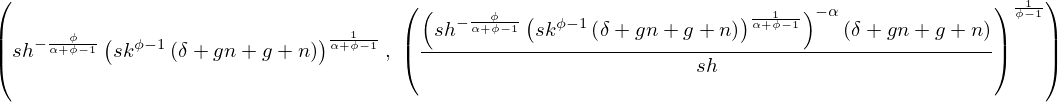

In [36]:
#We solve the steady state equations for h and k
sss = sm.solve((ss1, ss2),(k,h))[0]
display(sss)

This can be reduced to:

$$\tilde{k}^{\ast}=\left(\dfrac{s_K^{1-\varphi}s_H^{\varphi}}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\varphi}}$$

and

$$\tilde{h}^{\ast}=\left(\dfrac{s_K^{\alpha}s_H^{1-\alpha}}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\varphi}}$$

In [37]:
#We turn the solution into a Python funciton
ss_func = sm.lambdify((sh,sk,g,n,alpha,phi,delta),sss)

## Numerical solution

We can re-write the equations for the steady states of physical capital and human capital per capita as

\\[ 0 = \left(\dfrac{s_K^{1-\varphi}s_H^{\varphi}}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\varphi}} - \tilde{k}^{\ast} \\]

\\[ 0 = \left(\dfrac{s_K^{\alpha}s_H^{1-\alpha}}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\varphi}} - \tilde{h}^{\ast} \\]


whereby it becomes a root-finding problem.

In [38]:
#We define model parameters as plausible empirical values
sh = 0.1
sk = 0.1
g = 0.02
n = 0.01
alpha = 1/3
phi = 1/3
delta = 0.06

In [39]:
#We solve numerically for the steady state:

#We define the function for h
def h_func(k,sh,sk,g,n,alpha,phi,delta,h):
    """args:
    k     (float): Physical capital
    sh    (float): Investments in human capital
    sk    (float): Investments in physical capital
    g     (float): Growth in technology
    n     (float): Growth in labour force
    delta (float): Depreciation rate
    alpha (float): Return on physical capital
    phi   (float): Return on human capital
    h     (float): Human capital
    
    Returns: 
    The transition equation for human capital
        """
    return 1/((1+n)*(1+g))*(sh*k**(alpha)*h**(phi)+(1-delta)*h)-h

#We define the function for h
def k_func(h,sh,sk,g,n,alpha,phi,delta,k):
    """args:
    h     (float): Human capital
    sh    (float): Investments in human capital
    sk    (float): Investments in physical capital
    g     (float): Growth in technology
    n     (float): Growth in labour force
    delta (float): Depreciation rate
    alpha (float): Return on physical capital
    phi   (float): Return on human capital
    k     (float): Physical capital
    
    Returns: 
    The transition equation for physical capital
    """
    return 1/((1+n)*(1+g))*(sk*k**(alpha)*h**(phi)+(1-delta)*k)-k

#We define a function containing our h- and k-functions as well as vectors in place of the endogenous variables
obj1 = lambda x: [h_func(x[1],sh,sk,g,n,alpha,phi,delta,x[0]),k_func(x[0],sh,sk,g,n,alpha,phi,delta,x[1])]

#We solve the vector functions
sol = optimize.root(obj1,[1,1],method = 'broyden1')


In [40]:
#We define the analytical solution
analSolution = ss_func(sh,sk,g,n,alpha,phi,delta)

#We define the numerical solution
numSolution = sol.x

print(f'Analytical solution is: k* = {analSolution[0]:.3f}, h* = {analSolution[1]:.3f}')
print(f'Numerical solution is: k* = {nummiSolution[1]:.3f}, h* = {nummiSolution[0]:.3f}')


Analytical solution is: k* = 1.363, h* = 1.363
Numerical solution is: k* = 1.363, h* = 1.363


As expected, the numerical and analytical steady state values are identical.

# Further analysis

## Phase diagrams

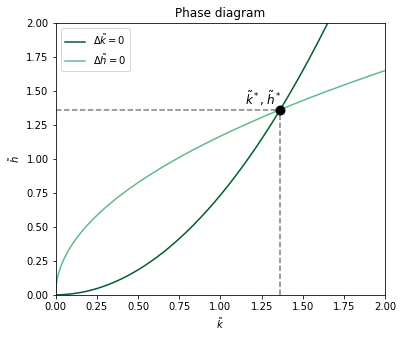

In [41]:
#We define a function expressing the nullclines
def solve_ss(sh,sk,g,n,alpha,phi,delta):
    """args:
    sh    (float): Investments in human capital
    sk     float): Investments in physical capital
    g     (float): Growth in technology
    n     (float): Growth in labour force
    alpha (float): Return on physical capital
    phi   (float): Return on human capital
    delta (float): Depriciation rate
    
    Returns:
    Nullclines for physical and human capital
    """
    
    # a. grids
    k_vec = np.linspace(1e-4,3,500)
    h_vec_DeltaK0 = np.empty(500)
    h_vec_DeltaH0  = np.empty(500)
    
    # b. solve for each k in grid
    for i,k in enumerate(k_vec):
        #Solve for delta_h=0
        
        # i. objective
        obj = lambda h: -h_func(k,sh,sk,g,n,alpha,phi,delta,h)

        # ii. optimizer
        result = optimize.root_scalar(obj,method='brentq',bracket=[1e-20,50])
        
        h_vec_DeltaH0[i] = result.root

       
        #Solve for delta_k=0
        # i. objective
        obj = lambda h: -k_func(h,sh,sk,g,n,alpha,phi,delta,k)

        # ii. optimizer
        result = optimize.root_scalar(obj,method='brentq',bracket=[1e-20,50])

        h_vec_DeltaK0[i] = result.root

    return k_vec, h_vec_DeltaK0, h_vec_DeltaH0


#Solve the function
k_vec, h_vec_DeltaK0, h_vec_DeltaH0 = solve_ss(sh,sk,g,n,alpha,phi,delta)


#Create the plot
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
ax.plot(k_vec,h_vec_DeltaK0, label=r'$\Delta \tilde{k}=0$', c='#005c2b')
ax.plot(k_vec,h_vec_DeltaH0, label=r'$\Delta \tilde{h}=0$', c='#61ba89')
ax.set_xlabel(r'$\tilde{k}$')
ax.set_ylabel(r'$\tilde{h}$')
ax.legend() 

#We mark the steady state
plt.scatter(sol.x[1],sol.x[0],color='black',s=80,zorder=2.5)

#Lines are drawn to mark ss-value on the axes
plt.axvline(sol.x[1],ymax=0.7,color='gray',linestyle='--') 
plt.axhline(sol.x[0],xmax=0.7,color='gray',linestyle='--') 

#Text is added to the plot
ax.text(1.15, 1.4, r'$\tilde{k}^*, \tilde{h}^*$', fontsize=12)

#The axis values are chosen
ax.set(xlim=(0, 2), ylim=(0, 2))

ax.set_title('Phase diagram');

Here the steady state occurs when the two nullclines intersect as illustrated above. The steady state values in the diagram are consistent with prior numerical and analytical results. 

We wish to see what happens, when the savings rate in human capital rises from its initial value

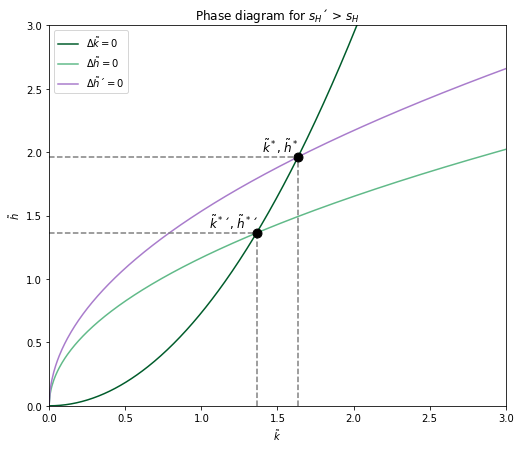

In [42]:
#We solve the function with the new value sh' = 0.12
k_vec1,h_vec_DeltaK01, h_vec_DeltaH01 = solve_ss(0.12,sk,g,n,alpha,phi,delta)

#We define our analytical solution with the new value sh' = 0.12
analSolution2 = ss_func(0.12,sk,g,n,alpha,phi,delta)

#Create the plot
fig2 = plt.figure(figsize=(18,7))
ax = fig2.add_subplot(1,2,1)
ax.plot(k_vec,h_vec_DeltaK0, label=r'$\Delta \tilde{k}=0$', c='#005c2b')
ax.plot(k_vec,h_vec_DeltaH0, label=r'$\Delta \tilde{h}=0$', c='#61ba89')
ax.plot(k_vec1,h_vec_DeltaH01, label=r'$\Delta \tilde{h}´=0$', c='#a97ccc')
ax.set_xlabel(r'$\tilde{k}$')
ax.set_ylabel(r'$\tilde{h}$')
ax.legend()
#We mark the initial steady state
plt.scatter(sol.x[1],sol.x[0],color='black',s=80,zorder=2.5) 
#We mark the new steady state
plt.scatter(analSolution2[0],analSolution2[1],color='black',s=80,zorder=2.5)

#Lines are drawn to mark the initial ss-value on the axes
plt.axvline(sol.x[1],ymax=0.45,color='gray',linestyle='--') 
plt.axhline(sol.x[0],xmax=0.45,color='gray',linestyle='--')

#Lines are drawn to mark the new ss-value on the axes
plt.axvline(analSolution2[0],ymax=0.65,color='gray',linestyle='--')
plt.axhline(analSolution2[1],xmax=0.55,color='gray',linestyle='--')

#Text is added to the plot
ax.text(1.4, 2.0, r'$\tilde{k}^*, \tilde{h}^*$', fontsize=12)
ax.text(1.05, 1.4, r'$\tilde{k}^*´, \tilde{h}^*$´', fontsize=12)

#The axis values are chosen
ax.set(xlim=(0, 3), ylim=(0, 3)) 

ax.set_title('Phase diagram for $s_H$´ > $s_H$');

The new phase diagram shows how the steady state values of both $\tilde{h}$ and $\tilde{k}$ rises as a result of the higher savings rate. The rise in the physical capital per capita, $\tilde{k}$ is caused by the increase in the total savings of physical capital occuring as a result of the higher levels of $Y$ induced by the new, higher value of $H$.

## Golden rule

We know that $\tilde{y}_t^\ast=\tilde{k}_t^{\ast \alpha}\tilde{h}_t^{\ast \varphi}$

In [43]:
#We define the y steady state function
def y_ss(sh,sk,g,n,alpha,phi,delta):
    """args:
    sh  (  float): Investments in human capital
    sk     float): Investments in physical capital
    g     (float): Growth in technology
    n     (float): Growth in labour force
    alpha (float): Return on physical capital
    phi   (float): return on human capital
    delta (float): depriciation rate
    
    Returns:
    Steady state value for total income
    """
    return ((sk**alpha*sh**(1-alpha))/(n+g+n*g+delta))**(alpha/(1-alpha-phi))*((sk**(1-phi)*sh**phi)/(n+g+n*g+delta))**(phi/(1-alpha-phi))

print(y_ss(sh,sk,g,n,alpha,phi,delta))

#We define the steady state function for c
def c_ss(sh,sk,g,n,alpha,phi,delta):
    """args:
    sh  (  float): Investments in human capital
    sk     float): Investments in physical capital
    g     (float): Growth in technology
    n     (float): Growth in labour force
    alpha (float): Return on physical capital
    phi   (float): return on human capital
    delta (float): depriciation rate
    
    Returns:
    Golden rule for private consumption
    """
    return (1-sk-sh)*((sk**alpha*sh**(1-alpha))/(n+g+n*g+delta))**(alpha/(1-alpha-phi))*((sk**(1-phi)*sh**phi)/(n+g+n*g+delta))**(phi/(1-alpha-phi)
                                                                                                                                )

1.2290991686373218


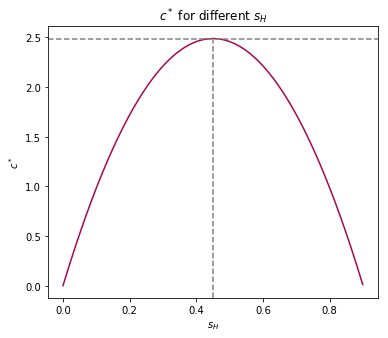

In [24]:
#We create a plot to show the variation in c when sh changes, all things equal

#we make an empty list to collect the differenc c-values
c_values = []
c_x = []

#We loop over different values of sh to find the corresponding values of c
for i in np.arange(0,0.9,0.001):
    c_values.append(c_ss(i,sk,g,n,alpha,phi,delta))
    c_x.append(i)

#Create the plot
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
ax.plot(c_x,c_values, color='#a60550')
ax.set_xlabel(r'$s_H$')
ax.set_ylabel(r'$c^*$')

#We mark the maximum value of c and the corresponding value of sh
plt.axvline(0.45,ymax=0.95,color='gray',linestyle='--')
plt.axhline(max(c_values),xmax=1,color='gray',linestyle='--')
ax.set_title('$c^*$ for different $s_H$');

In [26]:
#We find the largest ss-value of consumption pr. worker
print(f'The maximum private consumption per capita is: {max(c_values):.3f}')

#We find the sh value resulting in the maximum c value
print(f'The golden rule value of sh is: {(c_x[c_values.index(max(c_values))])}')

The maximum private consumption per capita is: 2.489
The golden rule value of sh is: 0.45


The optimal savings rate that maximises consumption is thus 0.45, which can be considered to be quite high. It seems that the rise in production caused by the increased savings outweighs the consumption lost due to a higher savings rate.

## Simulation

We want to simulate what happens when a permanent positive shock in $s_H$ occurs; when the savings of human capital rises permanently from a time period $t=2$ where $y_t=\dfrac{Y_t}{L_t}$

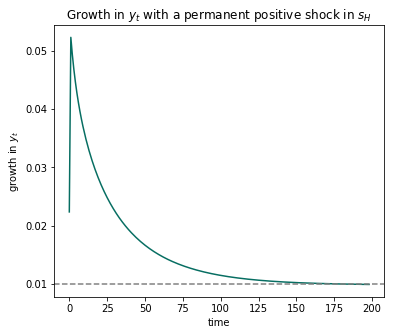

In [838]:
#The initial values of our variables are defined
A0, K0, H0, L0, Y0 = 1, 1, 1, 1, 1


#We define the functions using variables for the first period
Lt = (1+n)*L0
Yt = K0**alpha*H0**phi*A0**(1-alpha-phi)

#An empty list is made
growthyt = []

for i in range(200):
    #A permanent shock to sh from period 2
    if i <= 1:
        sh = 0.1
    else:
        sh = 0.2
        
    #Y function in previous period
    Ytm1 = Yt
    
    #L function in previous period
    Ltm1 = Lt
    
    #y function in previous period
    ytm1 = 0
    ytm1 = Ytm1/Ltm1
    
    #K function in current period 
    Kt=sk*Ytm1+(1-delta)*K0
    K0=Kt
    
    #H function in current period
    Ht = sh*Ytm1+(1-delta)*H0
    H0=Ht
    
    #A function in current period
    At = (1+g)*A0
    A0=At
    
    #L function in current period
    Lt = (1+n)*L0
    L0=Lt
    
    #Y function in current period
    Yt=Kt**alpha*Ht**phi*At**(1-alpha-phi)
    
    #y function in current period
    yt = Yt/Lt
    
    #We calculate the growth in yt using log
    growthyt.append(np.log(yt)-np.log(ytm1))

#Create the plot
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)



#We discard the first growth rate since ytm1 doesn't have a well defined value for period 0
ax.plot(growthyt[1:], color='#076e62')

plt.axhline(growthyt[199],xmax=1,color='gray',linestyle='--')

ax.set_xlabel(r'time')
ax.set_ylabel(r'growth in $y_t$')
ax.set_title('Growth in $y_t$ with a permanent positive shock in $s_H$');

The graph shows how an increase in the savings rate of human capital causes a spike in the growth rate in production per worker. From that point on, the growth subsides and continues to do so until a stable growth path is achieved.

# Conclusion

Our calculations show that for our parameter values a steady state arises. The value of $s_H$ has a positive impact on the steady state values of $\tilde{h}^*$ and $\tilde{k}^*$, which is initially caused by a direct change in $\tilde{h}^*$ from which a spillover effect occurs, affecting both $\tilde{k}^*$ and production. Furthermore the consumption maximising value of $s_H$ is found to be $0.45$. 